## Importing the Libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [60]:
df=pd.read_csv('Alcohol_Sales.csv',index_col='DATE', parse_dates=True,)
df.freq='MS'

In [61]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [62]:
# Check for date time index
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 1992-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   S4248SM144NCEN  325 non-null    int64
dtypes: int64(1)
memory usage: 5.1 KB


In [63]:
df.columns=['Sales']

In [64]:
df.head()

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


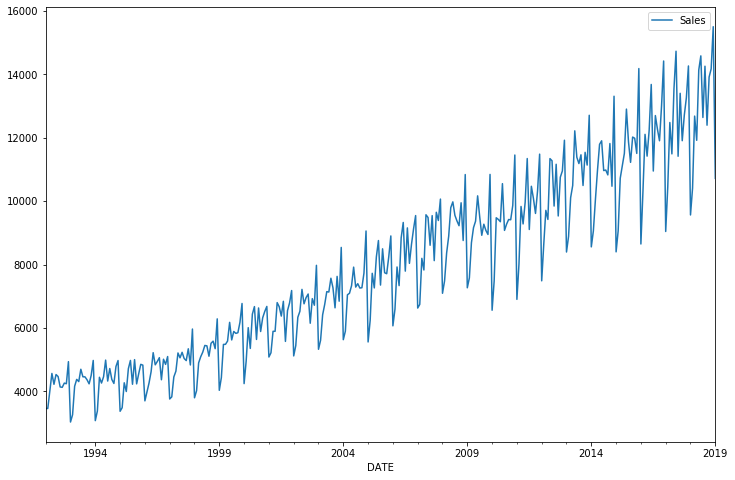

In [65]:
df.plot(figsize=(12,8))

#### Here we see SEASONALITY as well as TREND

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [67]:
result= seasonal_decompose(df['Sales'])

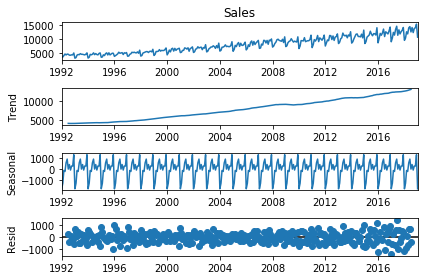

In [68]:
result.plot();

### To view all the Components of Time Series Seperately

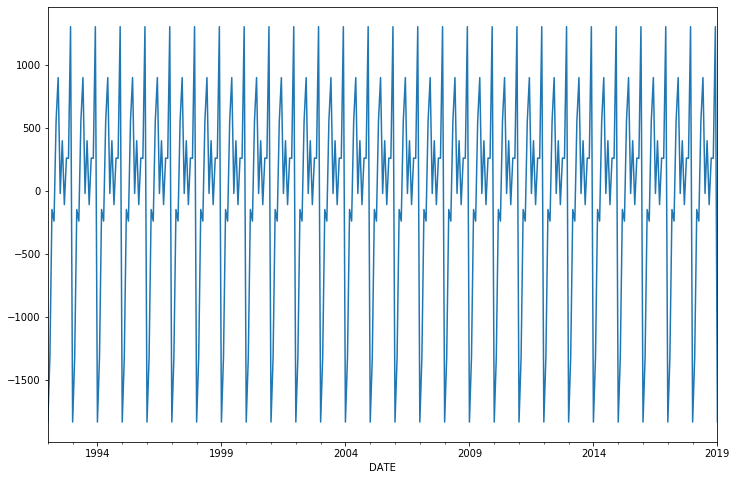

In [69]:
result.seasonal.plot(figsize=(12,8))

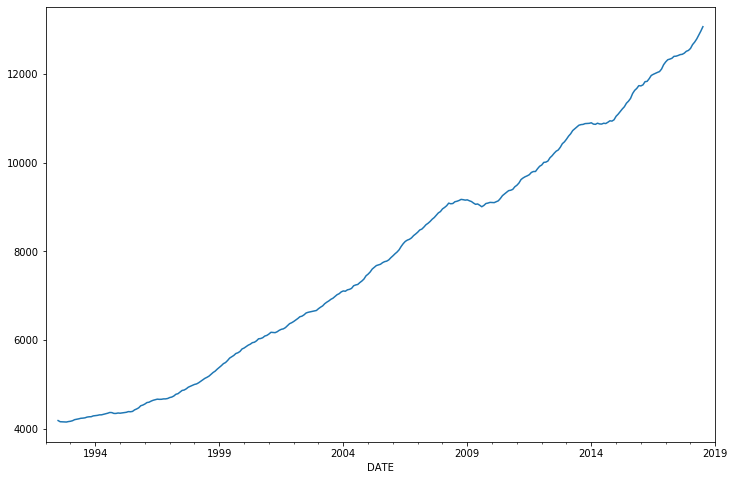

In [70]:
result.trend.plot(figsize=(12,8))

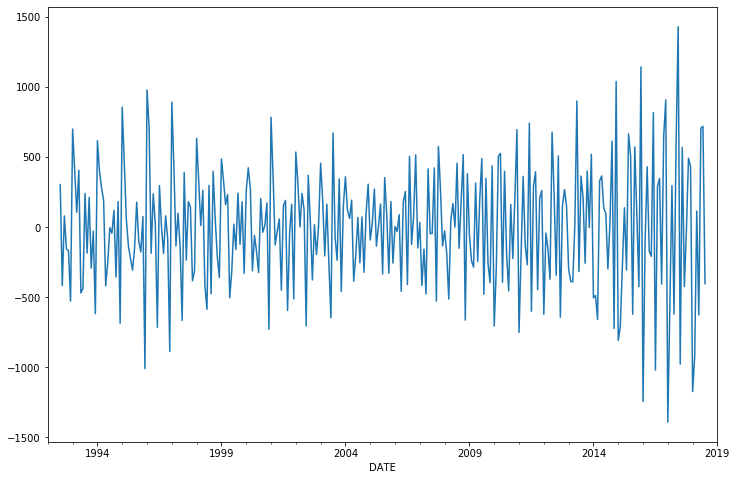

In [71]:
result.resid.plot(figsize=(12,8))

# Train Test Split

In [72]:
len(df)

325

In [73]:
325-12 # Prediction is required for a  year ahead

313

In [74]:
train= df.iloc[:313]
test= df.iloc[313:]

In [75]:
len(test)

12

## SCALE THE DATA (OR) NORMALISE THE DATA

In [76]:
ser= np.array([23,56,2,13,14])

In [77]:
# normalise ser
ser.max()  # fit

56

In [78]:
ser/ser.max()   # Transform

array([0.41071429, 1.        , 0.03571429, 0.23214286, 0.25      ])

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
scaler=MinMaxScaler()

In [81]:
scaler.fit(train) # finds the max value in train data

MinMaxScaler(copy=True, feature_range=(0, 1))

In [82]:
# Transform the training and testing data

scaled_train=scaler.transform(train)
scaled_test =scaler.transform(test)


## Use with Time Series Generator Object
# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [83]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [84]:
scaled_train

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ],
       [0.12804513],
       [0.12266006],
       [0.09453799],
       [0.09359774],
       [0.10496624],
       [0.10334217],
       [0.16283443],
       [0.        ],
       [0.0196598 ],
       [0.09650397],
       [0.11505257],
       [0.10906915],
       [0.14231986],
       [0.12197624],
       [0.12189076],
       [0.11394136],
       [0.10300026],
       [0.12556629],
       [0.16608257],
       [0.00376101],
       [0.02957518],
       [0.12069408],
       [0.10513719],
       [0.12214719],
       [0.16702282],
       [0.11052227],
       [0.14428584],
       [0.11479614],
       [0.10402599],
       [0.14984187],
       [0.16582614],
       [0.02897684],
       [0.03872126],
       [0.10582101],
       [0.08231473],
       [0.14394393],
       [0.16608257],
       [0.10188905],
       [0.16830498],
       [0.10291478],
       [0.13018207],
       [0.15556885],
       [0.153

In [85]:
scaled_test

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457],
       [1.0661595 ],
       [0.65706471]])

In [86]:
# define generator
# in TimeseriesGenerator (data,target) both should come from same source.
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [87]:
len(scaled_train)

313

In [88]:
len(generator)

311

In [89]:
313-2

311

In [90]:
x,y =generator[0]

In [91]:
x

array([[[0.03658432],
        [0.03649885]]])

In [92]:
y

array([[0.08299855]])

# Create the Model

In [93]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [95]:
# define generator
# in TimeseriesGenerator (data,target) both should come from same source.
n_input = 12
n_features = 1
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [98]:
model=  Sequential()
model.add(LSTM(150,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [99]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense (Dense)                (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.fit_generator(train_generator,epochs=25)

C:\Users\ebineet\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
301/301 [==============================] - 3s 5ms/step - loss: 0.0279
Epoch 2/25
301/301 [==============================] - 1s 4ms/step - loss: 0.0101
Epoch 3/25
301/301 [==============================] - 1s 4ms/step - loss: 0.0087
Epoch 4/25
301/301 [==============================] - ETA: 0s - loss: 0.007 - 1s 4ms/step - loss: 0.0078
Epoch 5/25
301/301 [==============================] - 1s 4ms/step - loss: 0.0065
Epoch 6/25
301/301 [==============================] - 1s 4ms/step - loss: 0.0041
Epoch 7/25
301/301 [==============================] - 2s 5ms/step - loss: 0.0034
Epoch 8/25
301/301 [==============================] - 1s 5ms/step - loss: 0.0029
Epoch 9/25
301/301 [==============================] - 2s 6ms/step - loss: 0.0026
Epoch 10/25
301/301 [==============================] - 2s 5ms/step - loss: 0.0023
Epoch 11/25
301/301 [==============================] - 2s 6ms/step - loss: 0.0026
Epoch 12/25
301/301 [==============================] - 3s 10ms/step - loss: 0.0018


In [101]:
model.history.history.keys()

dict_keys(['loss'])

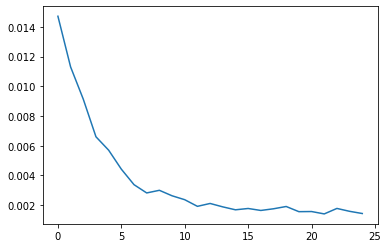

In [102]:
plt.plot(range(len(model.history.history['loss'])),model.history.history['loss'])

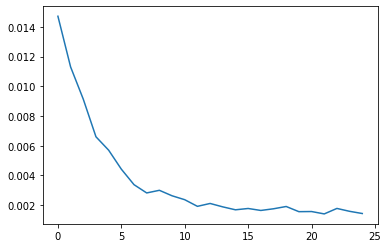

In [103]:
my_loss= model.history.history['loss']
plt.plot(range(len(my_loss)),model.history.history['loss'])

## Evaluation Test data

In [104]:
# see for 12 history steps and predict---> step 13
# last 12 points of training data to predict 1 point of test data


In [105]:
first_eval_batch= scaled_train[-12:]

In [106]:
first_eval_batch # these are the last 12 points of training set

array([[0.63432772],
       [0.80776135],
       [0.72313873],
       [0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ]])

In [109]:
first_eval_batch= first_eval_batch.reshape((1,n_input,n_features))

In [110]:
first_eval_batch

array([[[0.63432772],
        [0.80776135],
        [0.72313873],
        [0.89870929],
        [1.        ],
        [0.71672793],
        [0.88648602],
        [0.75869732],
        [0.82742115],
        [0.87443371],
        [0.96025301],
        [0.5584238 ]]])

In [111]:
model.predict(first_eval_batch) # this is the first point to Test dataset

array([[0.77612305]], dtype=float32)

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

## Forecast Using RNN Model

In [114]:
test_predictions= [] # hold predictions

# last n_input points from training set
first_eval_batch = scaled_train[-n_input:]

# reshape to the format RNN accepts (same format as TimeSeriesGenerator)
current_batch= first_eval_batch.reshape((1,n_input,n_features))

#How far into the future do we forecast
# if 24 points need to be predicted then len(test) replace with --> 24

for i in range(len(test)):
    
    # Grab the current prediction
    # One timestamp ahead of historical 12 points
    current_pred= model.predict(current_batch)[0]
    
    # Store the predictions
    test_predictions.append(current_pred)
    
    # UPDATE current batch to include predictions
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


In [115]:
my_first_pred = model.predict(current_batch)[0]

In [116]:
my_first_pred

array([0.89717996], dtype=float32)

In [117]:
current_batch

array([[[0.77612305],
        [0.88942301],
        [0.85639167],
        [1.00942624],
        [1.08881319],
        [0.84095752],
        [0.98468649],
        [0.84913015],
        [0.92803812],
        [0.97442627],
        [1.05149937],
        [0.70906305]]])

In [118]:
current_batch.shape

(1, 12, 1)

In [121]:
a= current_batch[:,1:,:] # only 1st point is removed suing such indexing

In [122]:
a

array([[[0.88942301],
        [0.85639167],
        [1.00942624],
        [1.08881319],
        [0.84095752],
        [0.98468649],
        [0.84913015],
        [0.92803812],
        [0.97442627],
        [1.05149937],
        [0.70906305]]])

In [123]:
a.shape

(1, 11, 1)

In [125]:
np.append(a,[[my_first_pred]],axis=1)

array([[[0.88942301],
        [0.85639167],
        [1.00942624],
        [1.08881319],
        [0.84095752],
        [0.98468649],
        [0.84913015],
        [0.92803812],
        [0.97442627],
        [1.05149937],
        [0.70906305],
        [0.89717996]]])

In [126]:
current_batch

array([[[0.77612305],
        [0.88942301],
        [0.85639167],
        [1.00942624],
        [1.08881319],
        [0.84095752],
        [0.98468649],
        [0.84913015],
        [0.92803812],
        [0.97442627],
        [1.05149937],
        [0.70906305]]])

#### Comapre current_batch to np.append(a,[[my_first_pred]],axis=1)

In [127]:
test_predictions= [] # hold predictions

# last n_input points from training set
first_eval_batch = scaled_train[-n_input:]

# reshape to the format RNN accepts (same format as TimeSeriesGenerator)
current_batch= first_eval_batch.reshape((1,n_input,n_features))

#How far into the future do we forecast
# if 24 points need to be predicted then len(test) replace with --> 24

for i in range(len(test)):
    
    # Grab the current prediction
    # One timestamp ahead of historical 12 points
    current_pred= model.predict(current_batch)[0]
    
    # Store the predictions
    test_predictions.append(current_pred)
    
    # UPDATE current batch to include predictions
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


In [128]:
test_predictions

[array([0.77612305], dtype=float32),
 array([0.889423], dtype=float32),
 array([0.85639167], dtype=float32),
 array([1.0094262], dtype=float32),
 array([1.0888132], dtype=float32),
 array([0.8409575], dtype=float32),
 array([0.9846865], dtype=float32),
 array([0.84913015], dtype=float32),
 array([0.9280381], dtype=float32),
 array([0.97442627], dtype=float32),
 array([1.0514994], dtype=float32),
 array([0.70906305], dtype=float32)]

## Invert the Scaling process

## Inverse Transformations and Compare

In [129]:
true_predictions = scaler.inverse_transform(test_predictions)

In [130]:
true_predictions

array([[12110.86352539],
       [13436.35982597],
       [13049.92612767],
       [14840.27753675],
       [15769.02545941],
       [12869.36205447],
       [14550.84729183],
       [12964.97366762],
       [13888.11796904],
       [14430.81292725],
       [15332.49109173],
       [11326.32865858]])

In [131]:
test

,Sales
DATE,
2018-02-01,10415
2018-03-01,12683
2018-04-01,11919
2018-05-01,14138
2018-06-01,14583
2018-07-01,12640
2018-08-01,14257
2018-09-01,12396
2018-10-01,13914


In [132]:
test['Predictions']= true_predictions

C:\Users\ebineet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [133]:
test

,Sales,Predictions
DATE,,
2018-02-01,10415,12110.863525
2018-03-01,12683,13436.359826
2018-04-01,11919,13049.926128
2018-05-01,14138,14840.277537
2018-06-01,14583,15769.025459
2018-07-01,12640,12869.362054
2018-08-01,14257,14550.847292
2018-09-01,12396,12964.973668
2018-10-01,13914,13888.117969


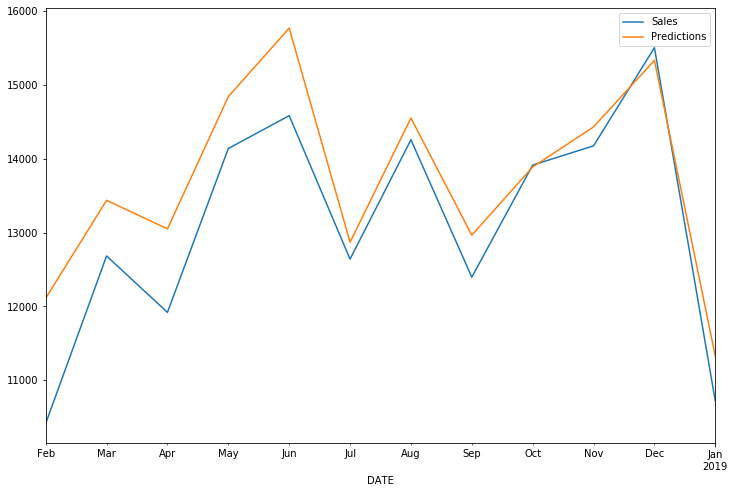

In [134]:
test.plot(figsize=(12,8))

# Saving and Loading Models

In [135]:
model.save('my_rnn_model.h5')

## load a model

In [136]:
from keras.models import load_model
new_model = load_model('my_rnn_model.h5')

In [137]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense (Dense)                (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________
